In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../Datasets/air_quality_shilin.csv')

C:\Users\vietl\AppData\Local\Temp\ipykernel_10528\4177667871.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../Datasets/air_quality_shilin.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65494 entries, 0 to 65493
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       65494 non-null  object 
 1   sitename   65494 non-null  object 
 2   aqi        65494 non-null  float64
 3   pollutant  65494 non-null  object 
 4   status     65494 non-null  object 
 5   so2        65494 non-null  float64
 6   co         65494 non-null  float64
 7   o3         65494 non-null  float64
 8   o3_8hr     65494 non-null  float64
 9   pm10       65494 non-null  float64
 10  pm2.5      65494 non-null  object 
 11  no2        65494 non-null  float64
 12  nox        65494 non-null  float64
 13  no         65494 non-null  float64
 14  windspeed  65494 non-null  float64
 15  winddirec  65494 non-null  float64
 16  co_8hr     65494 non-null  float64
 17  pm2.5_avg  65494 non-null  float64
 18  pm10_avg   65397 non-null  float64
 19  so2_avg    58796 non-null  float64
dtypes: flo

Thời gian trung bình giữa các lần AQI vượt ngưỡng nguy hiểm: -1 days +20:43:40.008661759


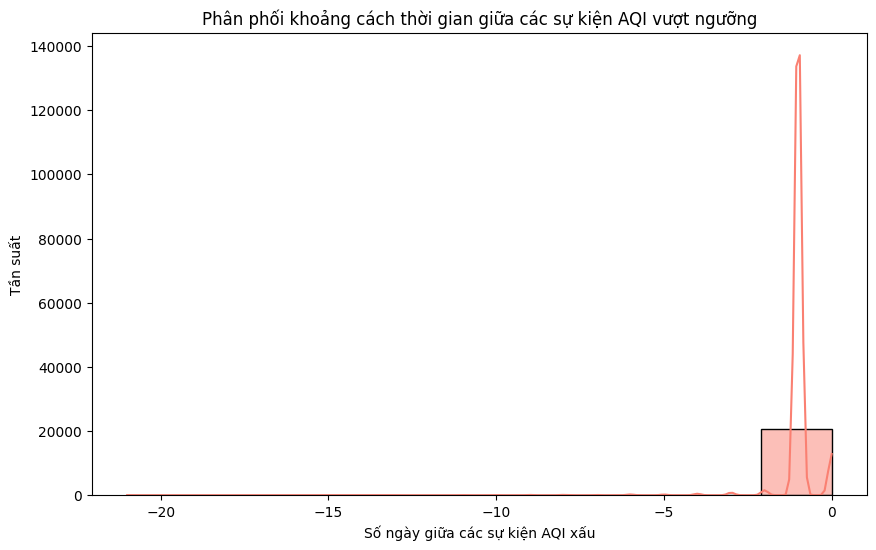

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Định ngưỡng AQI nguy hiểm
dangerous_threshold = 50

# Lọc những ngày có AQI vượt ngưỡng
dangerous_days = df[df['aqi'] > dangerous_threshold]['date']

# Chuyển cột 'date' sang kiểu datetime nếu cần thiết
dangerous_days = pd.to_datetime(dangerous_days)

# Tính khoảng cách thời gian giữa các sự kiện AQI xấu
time_diffs = dangerous_days.diff().dropna()

# Tính thời gian trung bình giữa các sự kiện AQI xấu
average_time_diff = time_diffs.mean()

print(f"Thời gian trung bình giữa các lần AQI vượt ngưỡng nguy hiểm: {average_time_diff}")

# Vẽ biểu đồ phân phối khoảng cách thời gian giữa các sự kiện
plt.figure(figsize=(10, 6))
sns.histplot(time_diffs.dt.days, bins=10, kde=True, color='salmon')
plt.xlabel('Số ngày giữa các sự kiện AQI xấu')
plt.ylabel('Tần suất')
plt.title('Phân phối khoảng cách thời gian giữa các sự kiện AQI vượt ngưỡng')
plt.show()